# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 23: Árboles de Decisión.


In [42]:
#from sklearn import datasets
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 14

import numpy as np
import sklearn as sk
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


##  1. Introducción.

Los métodos de clasificación corresponden a algortimos de aprendizaje supervisado que permiten predecir el valor de una variable categórica a partir de un conjunto de variables predictoras, que a su vez pueden ser numéricas o categóricas.

Cuando la variable de salida es binaria, podemos aplicar el modelo de regresión logística. En el caso que la variable dependiente tenga 3 o más valores posibles, es de utilidad el método de clasificación kNN (que también se puede aplicar al caso binario).



## 2. Clasificación por Árboles de Decisión

###  Clasificación binaria.

En este ejemplo, usaremos un dataset de RRSS para predecir si una persona realiza o no una compra luego de hacer clikc en un aviso publicitario en la red. Para ello, se requiere crear un clasificador que clasifique a cada usuario en la categoría correcta en base a sus características: compra o no compra.

Como predictores, utilizaremos la edad y salario estimado del usuario.

In [43]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})

In [45]:
from sklearn.model_selection import train_test_split

#seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary','Gender']]
y = df['Purchased']

#datos de entrenamiento y prueba
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)


Conclusión: ambas formas de normalización (manual y StandardScaler) dan el mismo resultado.

In [46]:
from sklearn.tree import DecisionTreeClassifier

#definimos el modelo y especificamos sus hiperparámetros
classifier = DecisionTreeClassifier(max_depth=6)

#ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6)

In [47]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test)

In [48]:
X_train

,Age,EstimatedSalary,Gender
280,59,88000,1
130,31,58000,0
14,18,82000,0
346,53,72000,0
228,40,72000,1
...,...,...,...
337,35,79000,0
126,42,65000,0
148,29,61000,0
20,45,22000,0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Clasificación Decision Trees - Female')

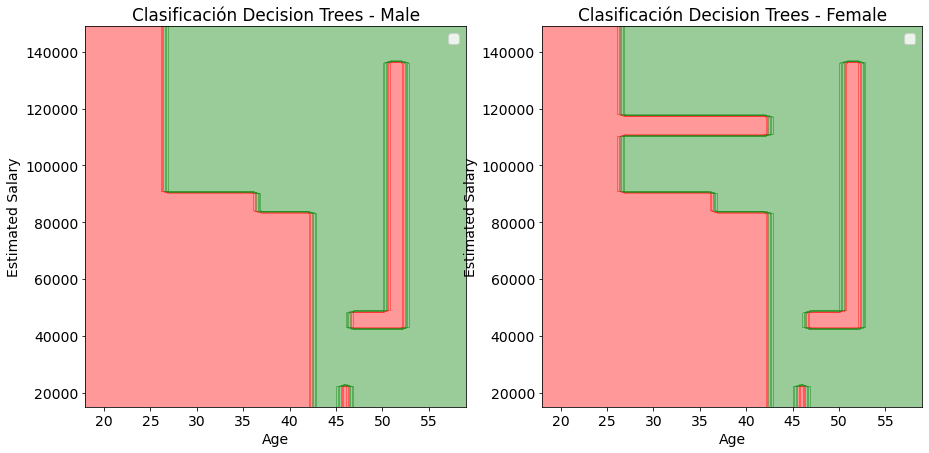

In [53]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train.Age.min(), X_train.Age.max(),1),
                     np.arange(X_train.EstimatedSalary.min(),X_train.EstimatedSalary.max(),1000))

X3_male=np.zeros(len(X1.ravel()))#male
X3_female=np.ones(len(X1.ravel()))#male

#male
X_grid=np.array([X1.ravel(), X2.ravel(),X3_male]).T  
mesh_predict=classifier.predict(X_grid).reshape(X1.shape)

im=ax1.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

#female
X_grid=np.array([X1.ravel(), X2.ravel(),X3_female]).T  
mesh_predict=classifier.predict(X_grid).reshape(X1.shape)
im=ax2.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))


for ax in [ax1,ax2]:
    #ax.scatter(X_train.Age,X_train.EstimatedSalary,c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
    #ax.scatter(X_test.Age,X_test.EstimatedSalary,c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('Estimated Salary')
    ax.legend()
    
ax1.set_title('Clasificación Decision Trees - Male')
ax2.set_title('Clasificación Decision Trees - Female')


Confusion matrix: [[68 11]
 [ 4 37]]
Accuracy: 0.875
Recall: 0.9024390243902439
Precision: 0.7708333333333334
F score: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        79
           1       0.77      0.90      0.83        41

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



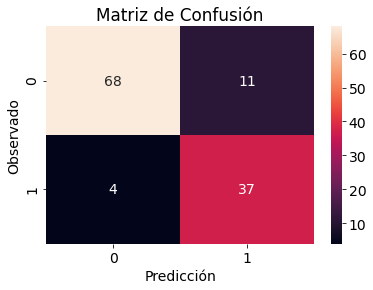

In [51]:
from sklearn import metrics

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred


print('Confusion matrix:',cm)

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

accuracy=metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) #(72+37)/120

recall=metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall) #21/32

precision=metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) #21/25

fscore=metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)